In [207]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import holoviews as hv
import numpy as np
hv.config(future_deprecations=True)
import hvplot.pandas
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"
%matplotlib inline

In [211]:
with open('../output/bl_ct.csv', "r") as bl:
    df_bl = pd.read_csv(bl)
with open('../output/bl_ct2.csv', "r") as bl2:
    df_bl_c = pd.read_csv(bl2)
with open('../output/yelp_ct.csv', "r") as y:
    df_y = pd.read_csv(y)

In [212]:
df_bl.rename({'open_count' :'New open'}, inplace=True,axis='columns')
df_bl_c.rename({'close_count' :'Close-down'}, inplace=True,axis='columns')
df_y.rename({'New Open' :'New open', 'Close': 'Close-down'}, inplace=True,axis='columns')

In [214]:
shape_map = gpd.read_file('../data/Philadelphia_Census_Tracts_2010/Philadelphia_Census_Tracts_2010.shp')
gdf = shape_map.to_crs(epsg=4326)  

df_bl['tractid'] = df_bl.apply(lambda x: str(int(x.census)), axis=1)
df_bl_c['tractid'] = df_bl_c.apply(lambda x: str(int(x.census)), axis=1)
df_y['tractid'] = df_y.apply(lambda x: str(int(x.tract)), axis=1)
gdf['tractid'] =gdf.apply(lambda x: str(int(x.TRACTCE10)) , axis=1)
df0=gdf.merge(df_y, on='tractid')
df_b0=gdf.merge(df_bl, on='tractid')
df_b1=gdf.merge(df_bl_c, on='tractid')

df1 = df_y[['tractid' , 'New open' , 'Close-down','post_covid']]
df1 = df1.groupby(['tractid','post_covid']).mean(['New open','Close-down'])
df1.reset_index(inplace=True)
df1=gdf.merge(df1, on='tractid')
df2 = df_bl[['tractid' , 'New open' , 'post_covid']]
df2 = df2.groupby(['tractid','post_covid']).mean('New open')
df2.reset_index(inplace=True)
df2=gdf.merge(df2, on='tractid')
df3 = df_bl_c[['tractid' , 'Close-down' , 'post_covid']]
df3 = df3.groupby(['tractid','post_covid']).mean('Close-down')
df3.reset_index(inplace=True)
df3=gdf.merge(df3, on='tractid')

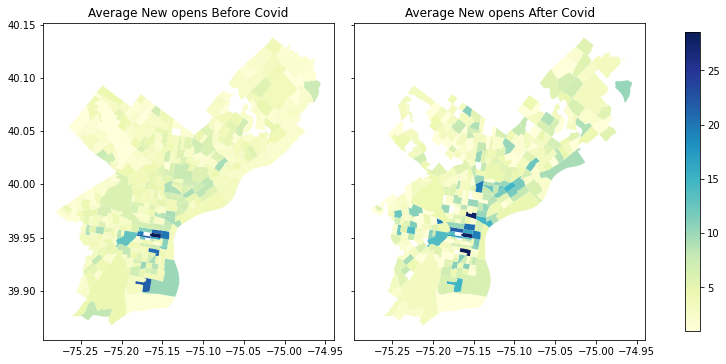

In [215]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average New opens Before Covid')
    else: 
        axs[index].set_title('Average New opens After Covid')
    df2[df2.post_covid==index].plot(column='New open', ax=axs[index],cmap='YlGnBu')

patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.savefig('../output/map_bl_open.png')

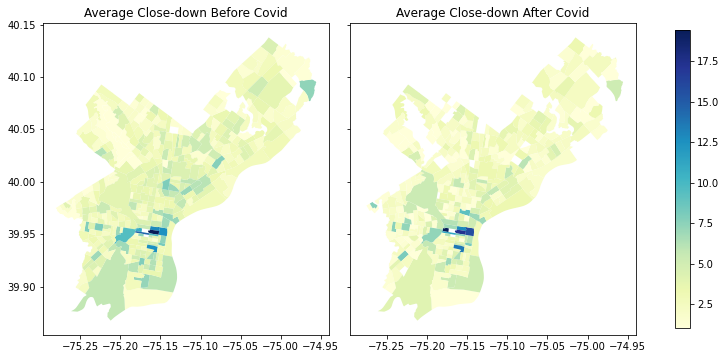

In [216]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average Close-down Before Covid')
    else: 
        axs[index].set_title('Average Close-down After Covid')
   
    df3[df3.post_covid==index].plot(column='Close-down', ax=axs[index],cmap='YlGnBu')

patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.savefig('../output/map_bl_close.png')

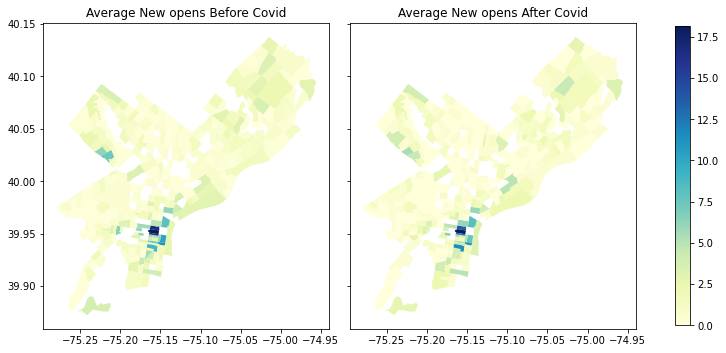

In [217]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average New opens Before Covid')
    else: 
        axs[index].set_title('Average New opens After Covid')
    df1[df1.post_covid==index].plot(column='New open', ax=axs[index],cmap='YlGnBu')

patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.savefig('../output/map_yelp_open.png')

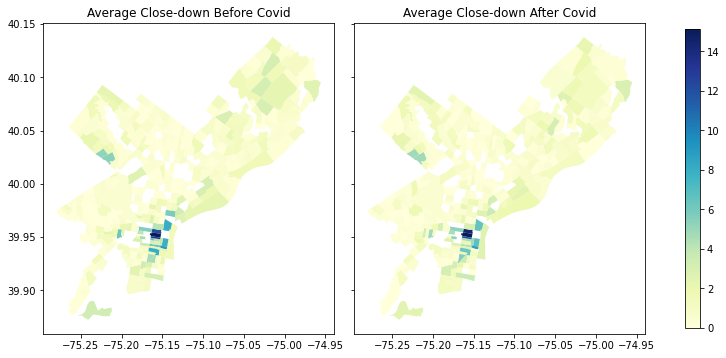

In [218]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average Close-down Before Covid')
    else: 
        axs[index].set_title('Average Close-down After Covid')
   
    df1[df1.post_covid==index].plot(column='Close-down', ax=axs[index],cmap='YlGnBu')

patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)

plt.savefig('../output/map_yelp_close.png')

In [219]:
groupbyyear = df0.groupby('year')['New open','Close-down'].sum()
groupbyyear.hvplot(x='year', y=['New open','Close-down'],
             value_label='Business Count')

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

In [220]:
groupbyyear0 = df_b0.groupby('year')['New open'].sum()
groupbyyear1 = df_b1.groupby('year')['Close-down'].sum()
groupbyyear = pd.DataFrame(groupbyyear0).merge(pd.DataFrame(groupbyyear1), on ='year')
groupbyyear.reset_index(inplace=True)
# smooth the outlier
a = int(groupbyyear[groupbyyear.year==2011]['Close-down'])
b = int(groupbyyear[groupbyyear.year==2013]['Close-down'])
groupbyyear.loc[groupbyyear.year==2012,'Close-down'] = np.mean([a,b])
groupbyyear[groupbyyear.year!=2022].hvplot(x='year', y=['New open','Close-down'],
             value_label='Business Count')

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

<AxesSubplot:>

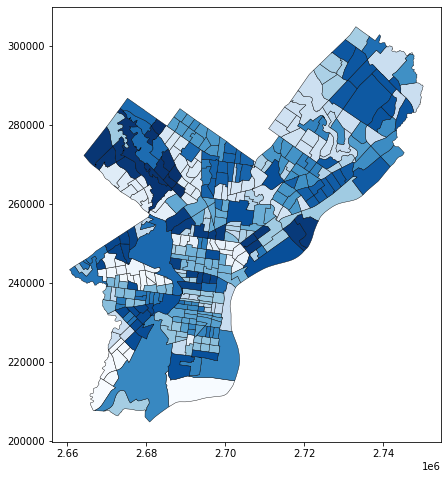

In [ ]:
gdf.plot(figsize=(16,8), cmap='Blues', edgecolor='black', linewidth=0.4)